<a href="https://colab.research.google.com/github/fboldt/postre/blob/main/aula10a_redu%C3%A7%C3%A3o_de_dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [2]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

(0,1)


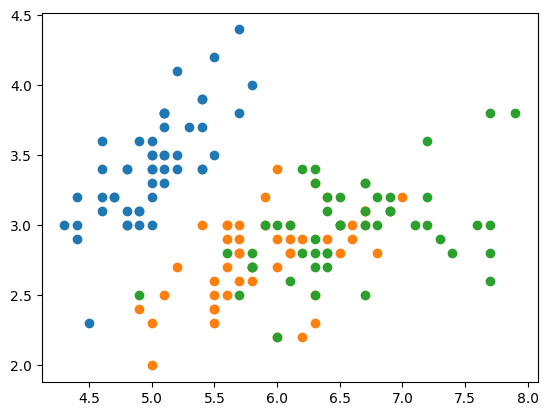

(0,2)


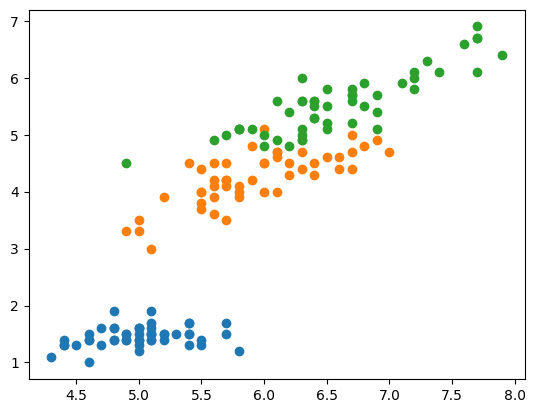

(0,3)


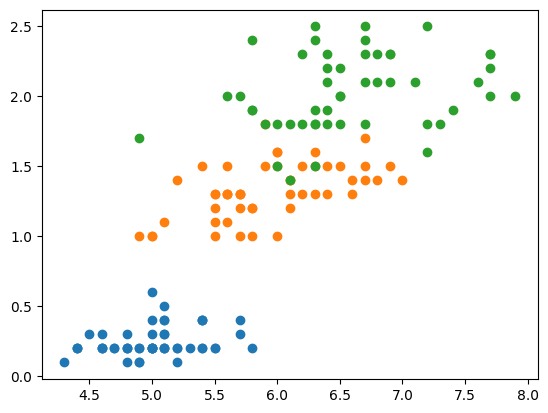

(1,2)


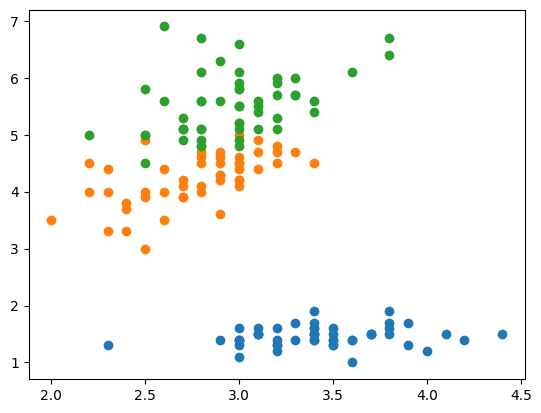

(1,3)


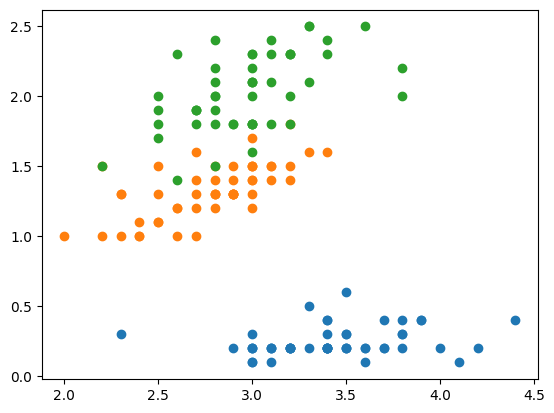

(2,3)


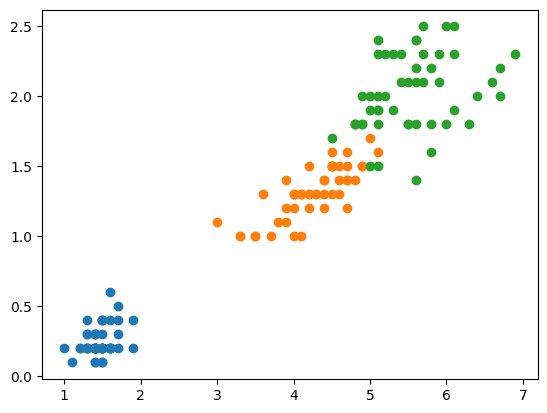

In [3]:
import matplotlib.pyplot as plt

for k in range(X.shape[1]-1):
  for j in range(k+1,X.shape[1]):
    print(f"({k},{j})")
    for i in range(len(set(y))):
      plt.scatter(X[y==i,k], X[y==i,j])
    plt.show()


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
import numpy as np

modelo = LogisticRegression(max_iter=200)
scores = cross_validate(modelo, X[:,2:4], y)
np.mean(scores['test_score'])

0.96

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X2D.shape

(150, 2)

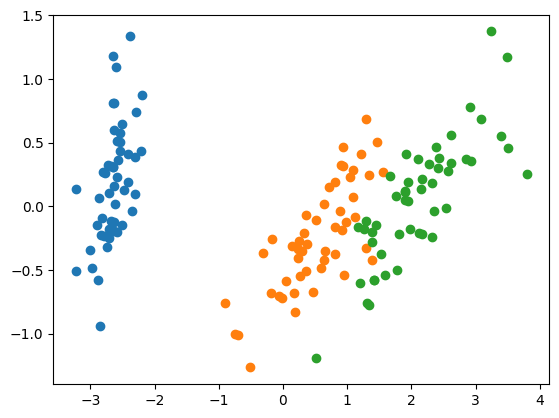

In [7]:
for i in range(len(set(y))):
  plt.scatter(X2D[y==i,0], X2D[y==i,1])
plt.show()

#PCA não melhora desempenho de classificação

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=200)
scores = cross_validate(modelo, X, y)
np.mean(scores['test_score'])

0.9733333333333334

In [9]:
modelo = LogisticRegression(max_iter=200)
scores = cross_validate(modelo, X2D, y)
np.mean(scores['test_score'])

0.96

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

modelo = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=200))
])

scores = cross_validate(modelo, X, y)
print(np.mean(scores['test_score']))

scores = cross_validate(modelo, X2D, y)
print(np.mean(scores['test_score']))

0.9600000000000002
0.96


In [11]:
np.var(X, axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

In [12]:
from sklearn.feature_selection import VarianceThreshold

feat_select = VarianceThreshold(0.6)
X2D = feat_select.fit_transform(X)
feat_select.variances_

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

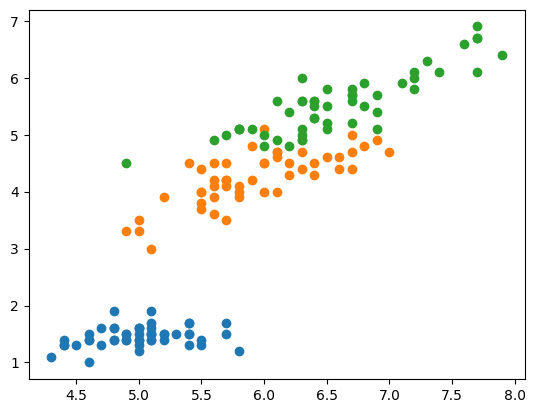

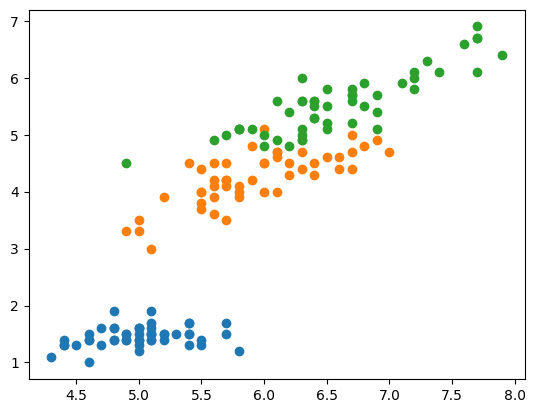

In [13]:
for i in range(len(set(y))):
  plt.scatter(X2D[y==i,0], X2D[y==i,1])
plt.show()
for i in range(len(set(y))):
  plt.scatter(X[y==i,0], X[y==i,2])
plt.show()

In [14]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

modelo = Pipeline([
    ('featse', VarianceThreshold(0.6)),
    ('logreg', LogisticRegression(max_iter=200))
])

scores = cross_validate(modelo, X, y)
np.mean(scores['test_score'])

0.9533333333333334

In [15]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

modelo = Pipeline([
    ('featse', SelectFromModel(estimator=LogisticRegression(max_iter=200))),
    ('logreg', LogisticRegression(max_iter=200))
])

scores = cross_validate(modelo, X, y)
np.mean(scores['test_score'])

0.96

In [16]:
from sklearn.feature_selection import SequentialFeatureSelector

modelo = Pipeline([
    ('featse', SequentialFeatureSelector(estimator=LogisticRegression(max_iter=200), n_features_to_select=2)),
    ('logreg', LogisticRegression(max_iter=200))
])

scores = cross_validate(modelo, X, y)
np.mean(scores['test_score'])

0.96

In [17]:
from sklearn.datasets import fetch_covtype
X, y = fetch_covtype(return_X_y=True)
X.shape, y.shape

((581012, 54), (581012,))

In [18]:
len(set(y))

7

In [19]:
from sklearn.linear_model import RidgeClassifier
modelo = RidgeClassifier()
scores = cross_validate(modelo, X, y)
np.mean(scores['test_score'])

0.639120922063683

In [20]:
modelo = Pipeline([
    ('featse', VarianceThreshold(0.01)),
    ('ridreg', RidgeClassifier())
])
scores = cross_validate(modelo, X, y)
np.mean(scores['test_score'])

0.6464150810342003

In [21]:
modelo = Pipeline([
    ('featse', SelectFromModel(estimator= RidgeClassifier())),
    ('ridreg', RidgeClassifier())
])

scores = cross_validate(modelo, X, y)
np.mean(scores['test_score'])

0.559435930303551

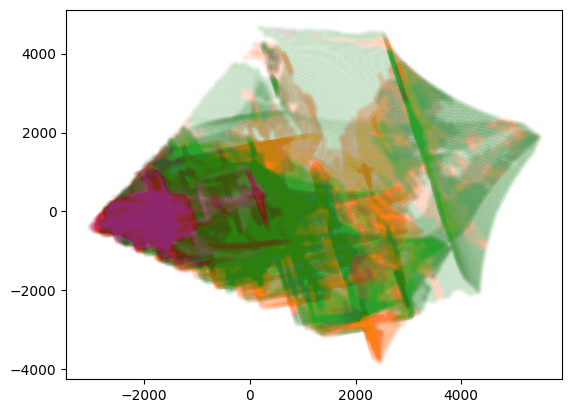

In [22]:
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
for i in range(len(set(y))):
  plt.scatter(X2D[y==i,0], X2D[y==i,1], marker='.', alpha=0.01)
plt.show()

In [23]:
# from sklearn.manifold import LocallyLinearEmbedding

# pca = LocallyLinearEmbedding(n_components=2)
# X2D = pca.fit_transform(X)
# for i in range(len(set(y))):
#   plt.scatter(X2D[y==i,0], X2D[y==i,1], marker='.', alpha=0.01)
# plt.show()

In [ ]:
# from sklearn.manifold import MDS

# pca = MDS(n_components=2)
# X2D = pca.fit_transform(X)
# for i in range(len(set(y))):
#   plt.scatter(X2D[y==i,0], X2D[y==i,1], marker='.', alpha=0.01)
# plt.show()

In [ ]:
# from sklearn.manifold import Isomap

# pca = Isomap(n_components=2)
# X2D = pca.fit_transform(X)
# for i in range(len(set(y))):
#   plt.scatter(X2D[y==i,0], X2D[y==i,1], marker='.', alpha=0.01)
# plt.show()

In [ ]:
# from sklearn.manifold import TSNE

# pca = TSNE(n_components=2)
# X2D = pca.fit_transform(X)
# for i in range(len(set(y))):
#   plt.scatter(X2D[y==i,0], X2D[y==i,1], marker='.', alpha=0.01)
# plt.show()